# 分析指标
- 各城市对数据分析岗位的需求情况
- 不同细分领域对数据分析岗的需求情况
- 数据分析岗位的薪资状况
- 工作经验与薪水的关系
- 技能要求
- 大公司都要求什么掌握什么技能
- 岗位的学历要求高吗
- 不同规模的企业对工资经验的要求以及提供的薪资水平

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
job = pd.read_csv("./job.csv")

display(job.shape,job["city"].unique())

# 取出我们进行后续分析所需的字段
columns = ["positionName", "companyShortName", "city", "companySize", "education", "financeStage",
           "industryField", "salary", "workYear","companyLabelList", "job_detail"]
job = job[columns].drop_duplicates()
# display(job.shape,job.head)

job.head()


(3140, 52)

array(['北京', '上海', '深圳', '广州', '杭州', '成都', '南京', '武汉', '西安', '厦门', '长沙',
       '苏州', '天津'], dtype=object)

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,15k-30k,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,10k-18k,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,20k-30k,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,33k-50k,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",10k-15k,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


In [2]:
#去除非数据分析岗的数据
cond =job["positionName"].str.contains("数据分析")
job = job[cond]
job
# 将薪水转化为数值
import re 
s = "15k-30k"
re.findall(r'(\d+)[k]-(\d+)[k]',s)

# 处理过程
"""
 1 将salary 转化为小写
 2. 运用正则表达式提取出薪资区间
 3. 将提取的薪资区间转化为int
 4. 取区间的平均值
"""
job["salary"] = job["salary"].str.lower()\
               .str.extract(r'(\d+)[k]-(\d+)k')\
               .applymap(lambda x:int(x))\
               .mean(axis=1)
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


In [3]:

# 从job_detail 提取技能要求
"""
将技能分为以下几类：
python/R

SQL 

Excel 
SPSS SAS
"""
job["job_detail"] = job["job_detail"].str.lower().fillna("")

job["Python"] = job["job_detail"].map(lambda x:1 if ("python" in x.lower())  else 0)
job["SQL"] = job["job_detail"].map(lambda x:1 if ('sql' in x) or ('hive' in x)  else 0)
job["Tableau"] = job["job_detail"].map(lambda x:1 if 'tableau' in x  else 0)
job["Excel"] = job["job_detail"].map(lambda x:1 if 'excel' in x  else 0)
job['SPSS/SAS'] = job['job_detail'].map(lambda x:1 if ('spss' in x) or ('sas' in x) else 0)
job.head()


,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0


In [4]:
# 处理行业信息

def clean_industry(industry):
    industry = industry.split(",") # 拆分
    if industry[0]=="移动互联网" and len(industry) >1 :
        return  industry[1]
    else:
        return industry[0]


job["industryField"] = job.industryField.map(clean_industry)

job["industryField"]


0        消费生活
1       移动互联网
2        消费生活
3          电商
4          电商
        ...  
3065    文娱丨内容
3069    医疗丨健康
3070    医疗丨健康
3071     企业服务
3088     软件开发
Name: industryField, Length: 1404, dtype: object

In [5]:
# 查看电脑自带的字体
from matplotlib.font_manager import FontManager
fm = FontManager()
[font.name for font in fm.ttflist]

['DejaVu Serif',
 'DejaVu Sans Display',
 'cmb10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'cmmi10',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'cmsy10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmss10',
 'STIXGeneral',
 'cmr10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXSizeOneSym',
 'Noto Sans PhagsPa',
 'Khmer Sangam MN',
 'Diwan Thuluth',
 'Mishafi Gold',
 'Kannada MN',
 'Zapfino',
 'Sinhala MN',
 'Phosphate',
 'Hiragino Sans',
 'Noto Sans Lepcha',
 'Noto Sans Marchen',
 'Arial',
 'Skia',
 'Noto Sans Meetei Mayek',
 'Times New Roman',
 'DecoType Naskh',
 'STIXSizeOneSym',
 'Myanmar MN',
 'STIXSizeOneSym',
 'Arial Un

In [6]:
# 设置字体
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['font.size'] = 20

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1
4,数据分析,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,数据分析专员,快手,天津,2000人以上,本科,D轮及以上,文娱丨内容,9.0,1-3年,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...,0,0,0,1,0
3069,数据分析专员,林之尚沃,天津,15-50人,本科,不需要融资,医疗丨健康,8.0,1-3年,[],【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...,0,0,0,1,0
3070,数据分析实习生,林之尚沃,天津,15-50人,本科,不需要融资,医疗丨健康,3.0,不限,[],工作职责：||1、 深入理解业务，负责运营数据分析工作；||2、 跟进运营数据需求，协助搭建...,1,1,1,1,0
3071,ETL/大数据/数据分析/实施,格蒂电力,天津,500-2000人,大专,未融资,企业服务,9.0,3-5年,"['技能培训', '带薪年假', '绩效奖金', '岗位晋升']",工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....,0,1,0,0,0


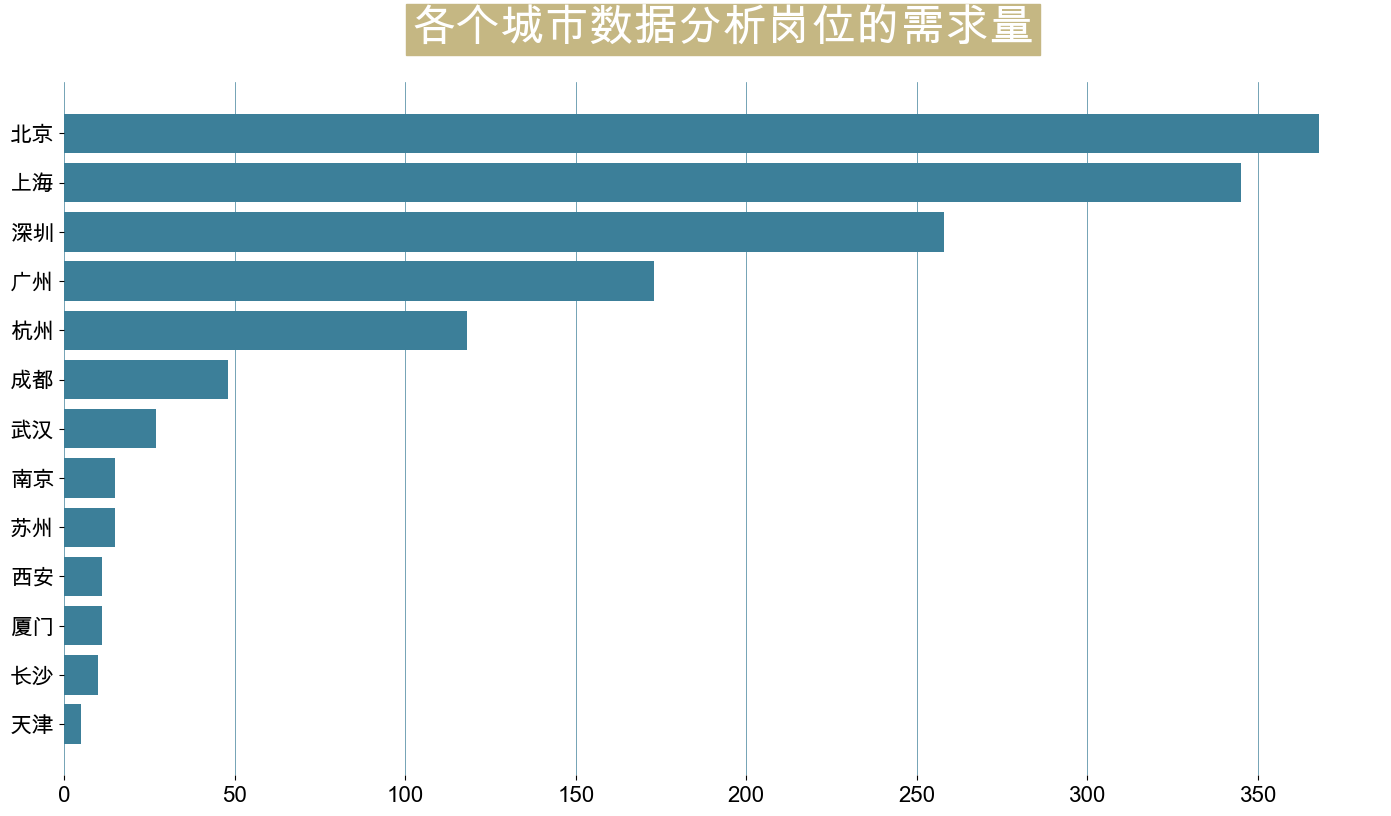

In [10]:
plt.figure(figsize=(17,9))
cities = job["city"].value_counts()
cities 

plt.barh(y =cities.index[::-1],
        width = cities.values[::-1],color="#3c7f99")
plt.box(False)
plt.title(label = "各个城市数据分析岗位的需求量",fontsize=32,weight="bold",
         color="white",backgroundcolor="#c5b783",pad=30)
plt.tick_params(labelsize=16)
plt.grid(axis='x',linewidth=0.5,color='#3c7f99')

 

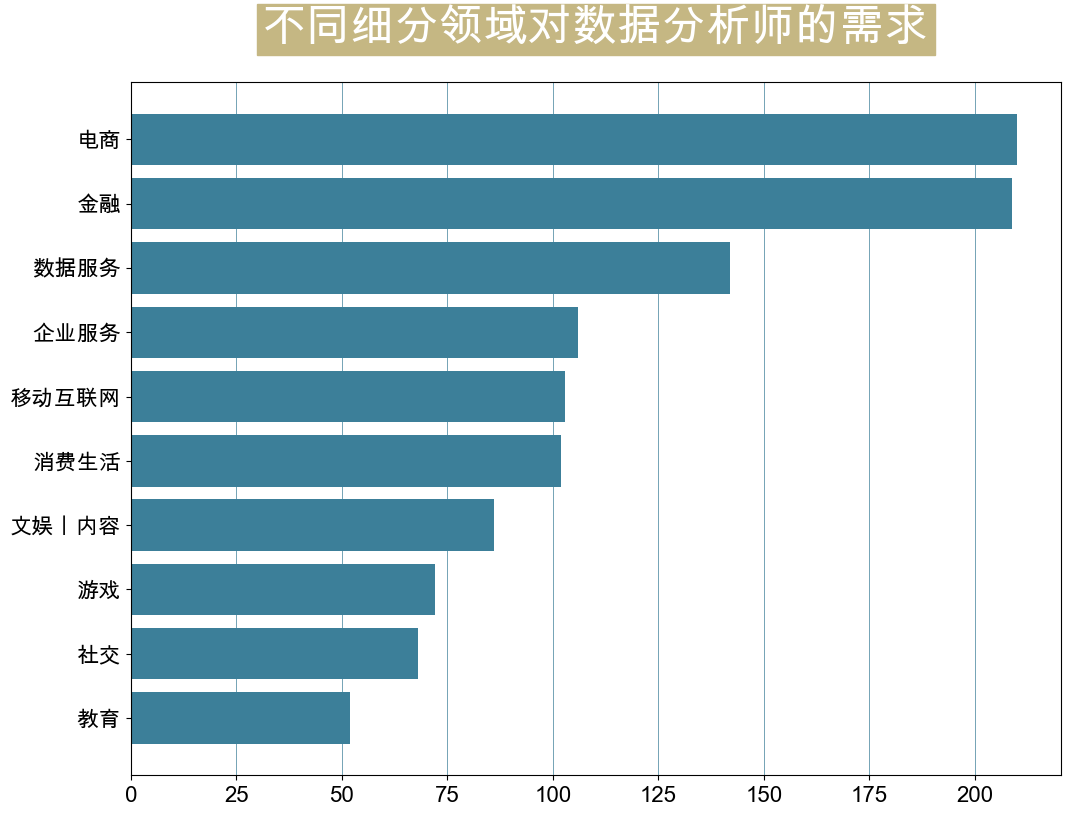

In [12]:
# 不同细分领域对数据分析师的需求
industry = job["industryField"].value_counts()[:10]
plt.figure(figsize=(12,9))
plt.barh(y = industry.index[::-1],
        width = industry.values[::-1],
        color="#3c7f99")
plt.title(label = "不同细分领域对数据分析师的需求",fontsize=32,weight="bold",
         color="white",backgroundcolor="#c5b783",pad=30)
plt.tick_params(labelsize=16)
plt.grid(axis='x',linewidth=0.5,color='#3c7f99')


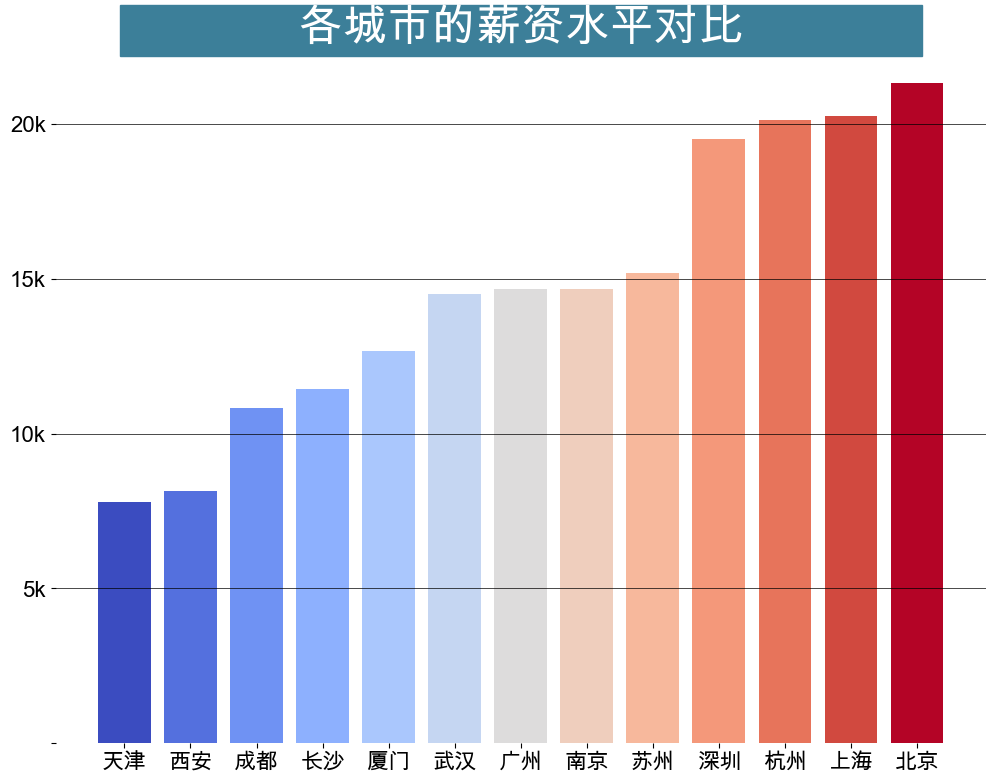

In [18]:
plt.figure(figsize=(12,9))
city_salary = job.groupby('city')["salary"].mean().sort_values()
city_salary

plt.bar(x =city_salary.index,height = city_salary.values,
        color=plt.cm.coolwarm(np.linspace(0,1,len(city_salary)))
       )
plt.title(label='              各城市的薪资水平对比              ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
plt.tick_params(labelsize=16)
plt.grid(axis = 'y',linewidth = 0.5,color = 'black')

plt.yticks(ticks =np.arange(0,25,step=5,),labels = ["","5k","10k","15k","20k"])
plt.box(False)

In [19]:
job["workYear"].unique()

array(['3-5年', '1-3年', '1年以下', '不限', '5-10年', '应届毕业生', '10年以上'],
      dtype=object)